Grupa 5

In [5]:
%pip install sympy numpy matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


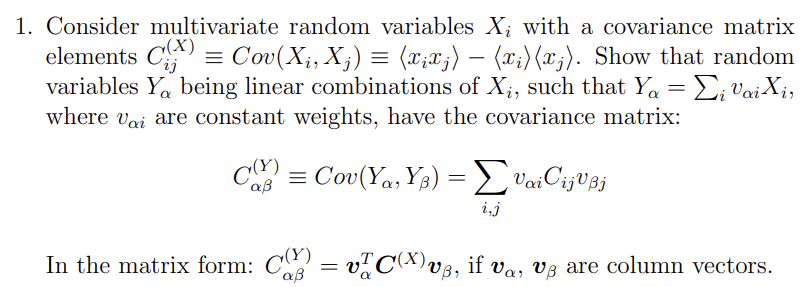

In [6]:
import numpy as np

def compute_covariance_Y(v, C_X):
    return v.T @ C_X @ v

C_X = np.array([[1.0, 0.5, 0.2],
                [0.5, 1.0, 0.3],
                [0.2, 0.3, 1.0]])

v = np.array([[1.0, 0.5],
              [0.5, 1.0],
              [0.2, 0.3]])

C_Y = compute_covariance_Y(v, C_X)

print("Covariance matrix C(Y):")
print(C_Y)


Covariance matrix C(Y):
[[1.93 1.87]
 [1.87 2.08]]


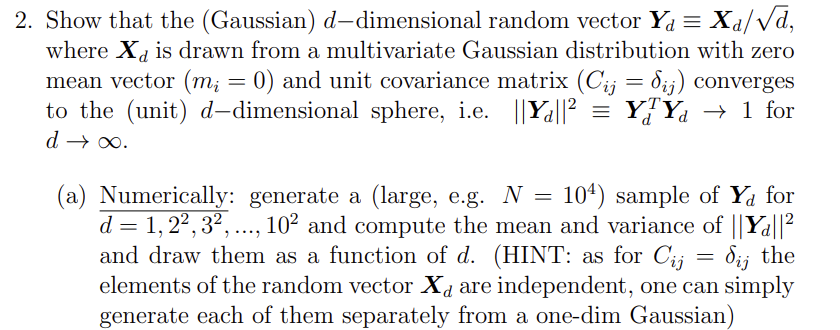

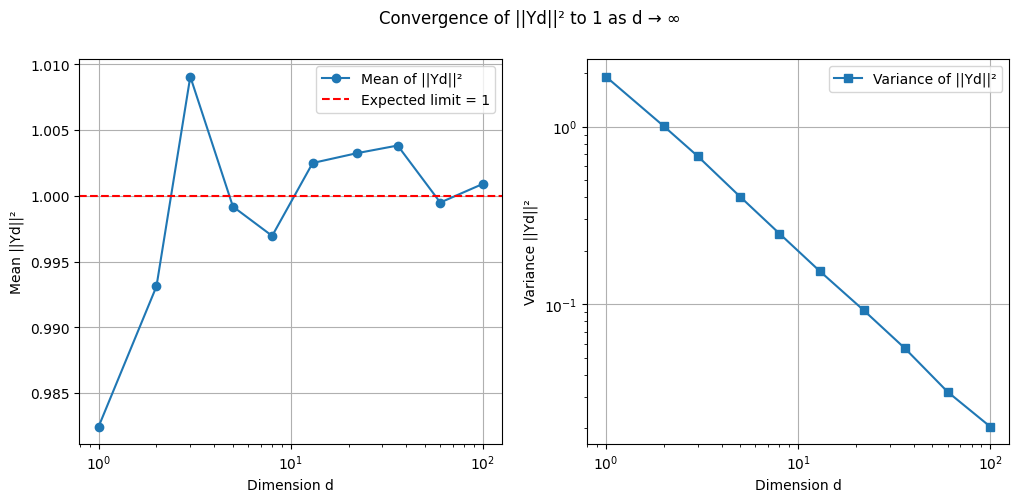

In [7]:
import matplotlib.pyplot as plt

N = 10**4 
dims = np.round(np.logspace(0, 2, 10)).astype(int)

mean_norms = []
var_norms = []

for d in dims:
    Xd = np.random.randn(N, d) 
    Yd = Xd / np.sqrt(d) 
    norms_squared = np.sum(Yd**2, axis=1) 
    
    mean_norms.append(np.mean(norms_squared)) 
    var_norms.append(np.var(norms_squared)) 

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(dims, mean_norms, marker='o', label="Mean of ||Yd||²")
plt.axhline(y=1, color='r', linestyle='--', label="Expected limit = 1")
plt.xlabel("Dimension d")
plt.ylabel("Mean ||Yd||²")
plt.xscale("log")
plt.legend()
plt.grid()


plt.subplot(1, 2, 2)
plt.plot(dims, var_norms, marker='s', label="Variance of ||Yd||²")
plt.xlabel("Dimension d")
plt.ylabel("Variance ||Yd||²")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.grid()

plt.suptitle("Convergence of ||Yd||² to 1 as d → ∞")
plt.show()


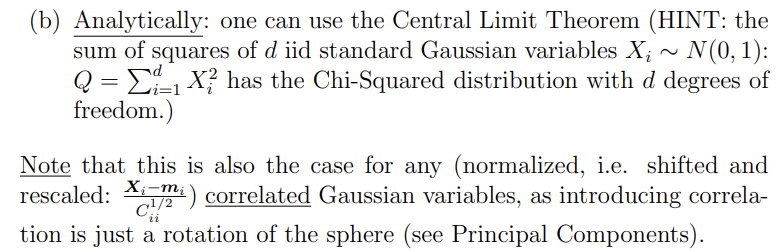

Odpowiedź w zdjęciu 2.2.jpg

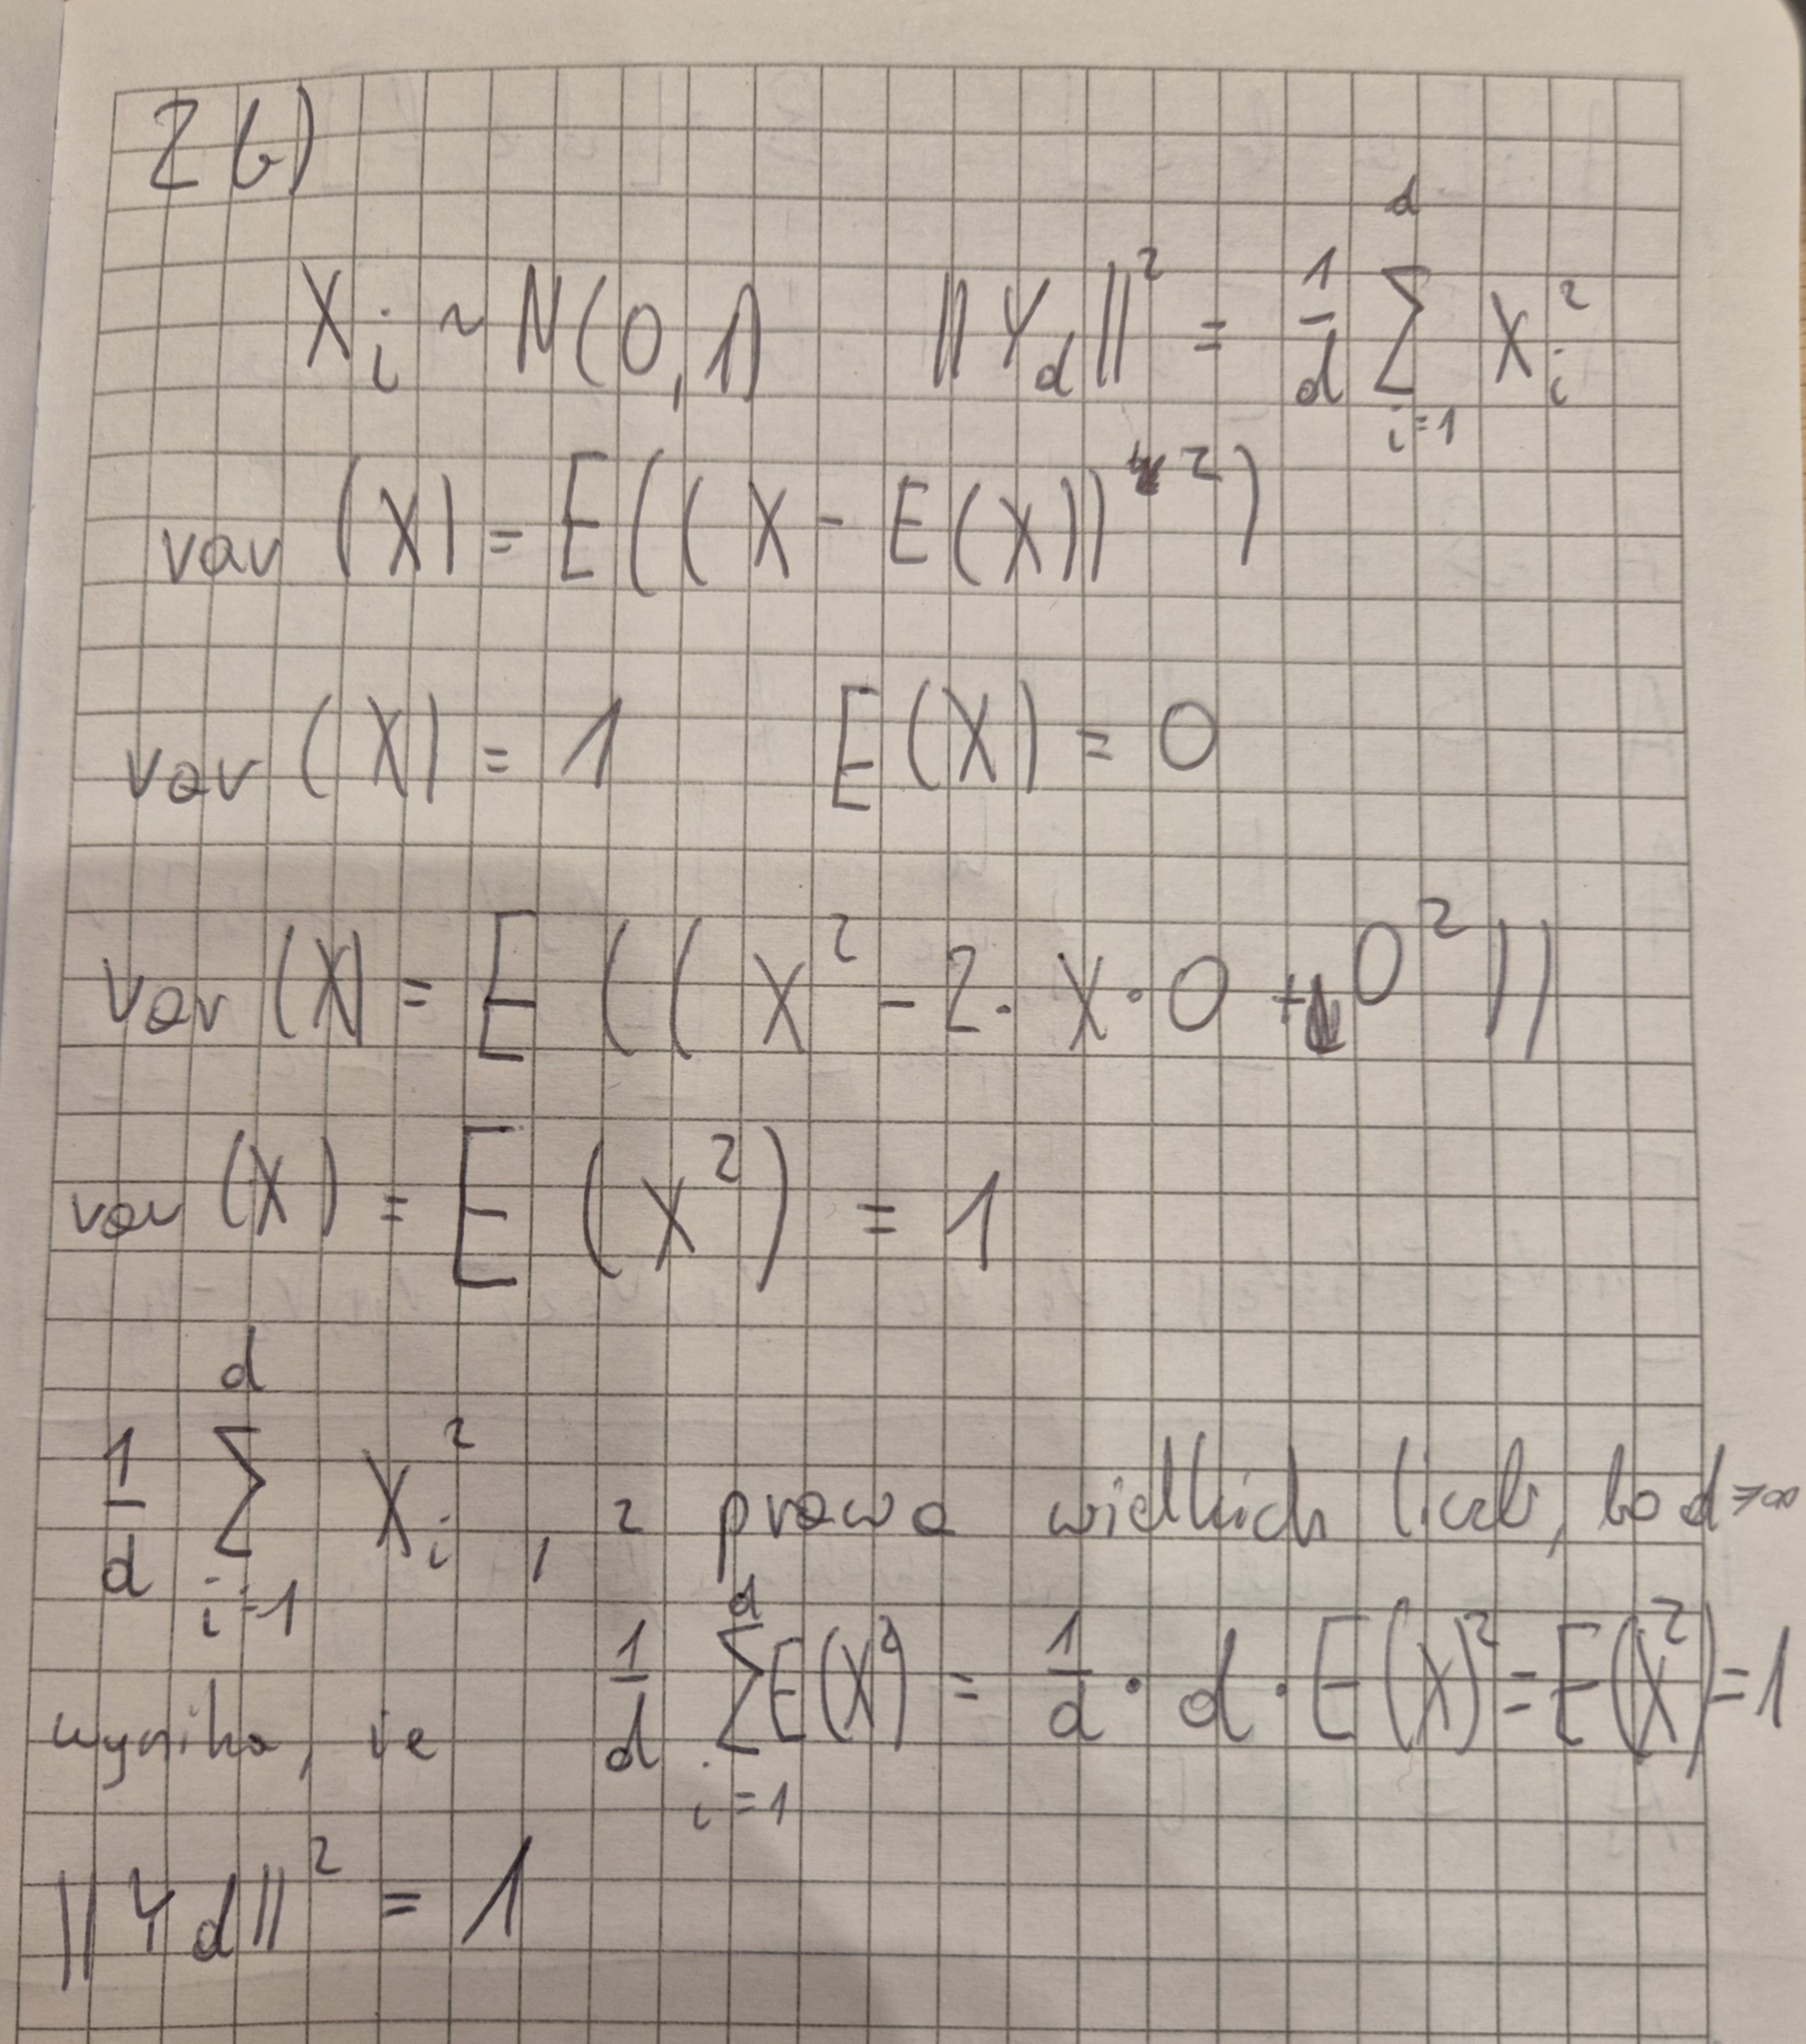

In [8]:
from IPython.display import Image, display

display(Image(filename='2.2b.jpg'))

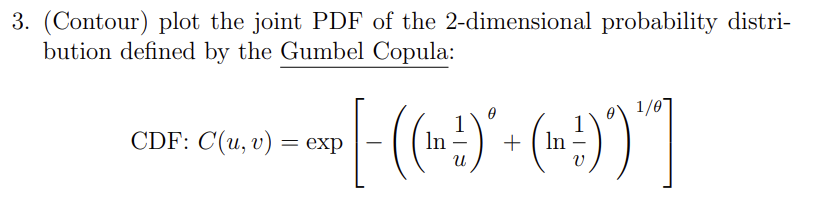

<lambdifygenerated-11>:2: RuntimeWarning: invalid value encountered in divide
  return (-log(u))**1.0*(-log(v))**1.0*exp(-((-log(u))**1.0 + (-log(v))**1.0)**1.0)/(u*v*log(u)*log(v))


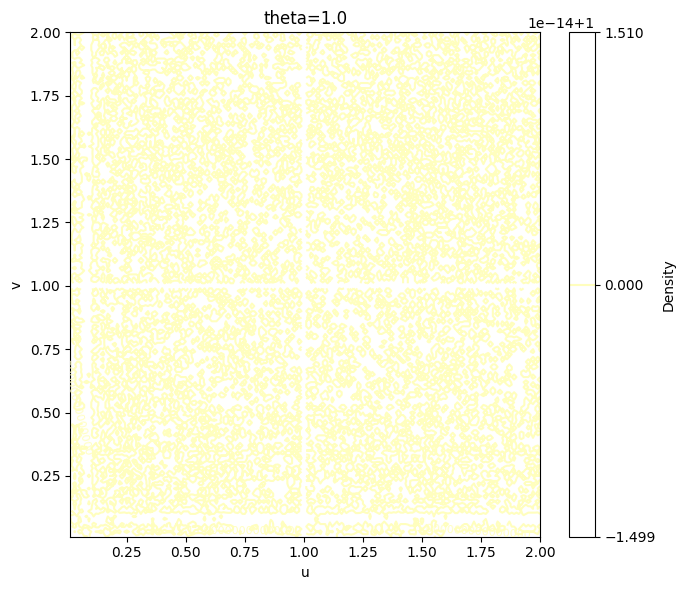

<lambdifygenerated-12>:2: RuntimeWarning: invalid value encountered in power
  return 0.5*(-log(u))**1.5*(-log(v))**1.5*((-log(u))**1.5 + (-log(v))**1.5)**(-1.33333333333333)*exp(-((-log(u))**1.5 + (-log(v))**1.5)**0.666666666666667)/(u*v*log(u)*log(v)) + (-log(u))**1.5*(-log(v))**1.5*((-log(u))**1.5 + (-log(v))**1.5)**(-0.666666666666667)*exp(-((-log(u))**1.5 + (-log(v))**1.5)**0.666666666666667)/(u*v*log(u)*log(v))
<lambdifygenerated-12>:2: RuntimeWarning: divide by zero encountered in power
  return 0.5*(-log(u))**1.5*(-log(v))**1.5*((-log(u))**1.5 + (-log(v))**1.5)**(-1.33333333333333)*exp(-((-log(u))**1.5 + (-log(v))**1.5)**0.666666666666667)/(u*v*log(u)*log(v)) + (-log(u))**1.5*(-log(v))**1.5*((-log(u))**1.5 + (-log(v))**1.5)**(-0.666666666666667)*exp(-((-log(u))**1.5 + (-log(v))**1.5)**0.666666666666667)/(u*v*log(u)*log(v))
<lambdifygenerated-12>:2: RuntimeWarning: invalid value encountered in multiply
  return 0.5*(-log(u))**1.5*(-log(v))**1.5*((-log(u))**1.5 + (-log(v))**1.5)*

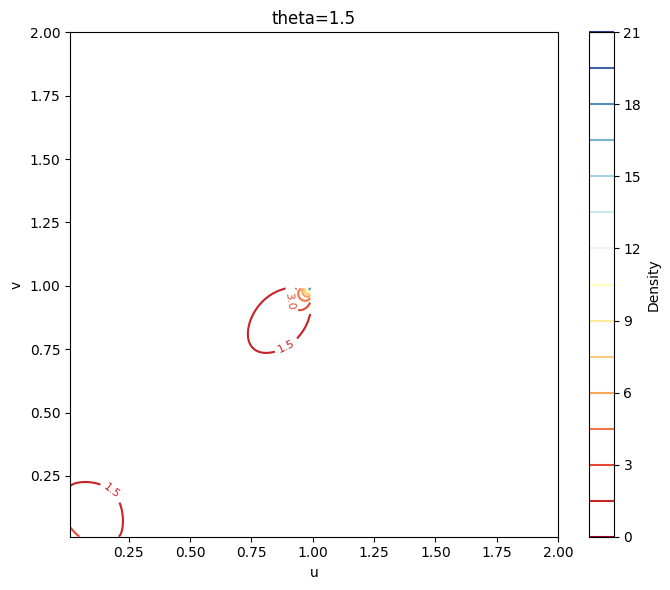

<lambdifygenerated-13>:2: RuntimeWarning: divide by zero encountered in power
  return 1.0*(-log(u))**2.0*(-log(v))**2.0*((-log(u))**2.0 + (-log(v))**2.0)**(-1.5)*exp(-((-log(u))**2.0 + (-log(v))**2.0)**0.5)/(u*v*log(u)*log(v)) + (-log(u))**2.0*(-log(v))**2.0*((-log(u))**2.0 + (-log(v))**2.0)**(-1.0)*exp(-((-log(u))**2.0 + (-log(v))**2.0)**0.5)/(u*v*log(u)*log(v))
<lambdifygenerated-13>:2: RuntimeWarning: invalid value encountered in multiply
  return 1.0*(-log(u))**2.0*(-log(v))**2.0*((-log(u))**2.0 + (-log(v))**2.0)**(-1.5)*exp(-((-log(u))**2.0 + (-log(v))**2.0)**0.5)/(u*v*log(u)*log(v)) + (-log(u))**2.0*(-log(v))**2.0*((-log(u))**2.0 + (-log(v))**2.0)**(-1.0)*exp(-((-log(u))**2.0 + (-log(v))**2.0)**0.5)/(u*v*log(u)*log(v))
<lambdifygenerated-13>:2: RuntimeWarning: invalid value encountered in divide
  return 1.0*(-log(u))**2.0*(-log(v))**2.0*((-log(u))**2.0 + (-log(v))**2.0)**(-1.5)*exp(-((-log(u))**2.0 + (-log(v))**2.0)**0.5)/(u*v*log(u)*log(v)) + (-log(u))**2.0*(-log(v))**2.0*((-l

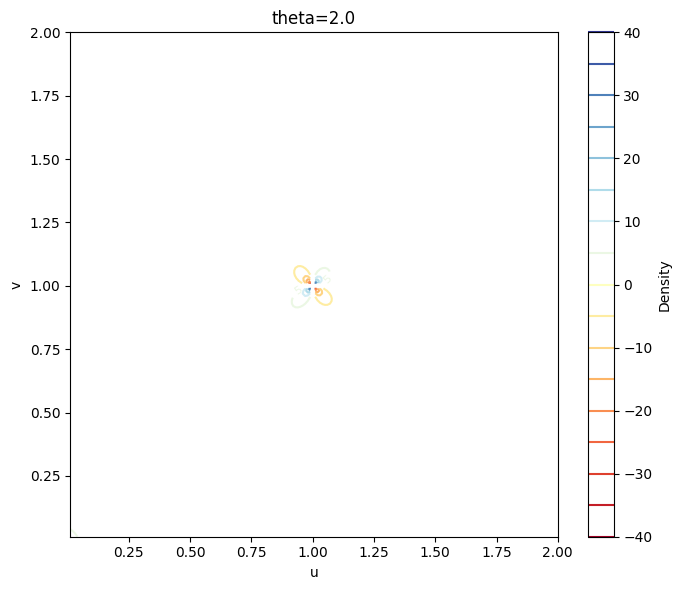

In [17]:
import sympy
import numpy as np
import matplotlib.pyplot as plt



thetas = [1.0, 1.5, 2.0]
for theta_value in thetas:
    u, v = sympy.symbols('u v', positive=True)  
    theta = sympy.Symbol('theta', positive=True)

    A = (-sympy.log(u))**theta
    B = (-sympy.log(v))**theta

    C = sympy.exp(- (A + B)**(1/theta))

    dC_du = sympy.diff(C, u)    
    pdf_sym = sympy.diff(dC_du, v)
    pdf_func = sympy.lambdify((u, v), pdf_sym.subs(theta, theta_value), 'numpy')

    N = 200
    u_vals = np.linspace(0.01, 2, N)
    v_vals = np.linspace(0.01, 2, N)


    U, V = np.meshgrid(u_vals, v_vals)
    PDF = pdf_func(U, V)

    plt.figure(figsize=(7,6))
    cs = plt.contour(U, V, PDF, levels=15, cmap='RdYlBu')
    plt.clabel(cs, inline=True, fontsize=8)
    plt.title(f"theta={theta_value}")
    plt.xlabel("u")
    plt.ylabel("v")
    plt.colorbar(cs, label="Density")
    plt.tight_layout()
    plt.show()

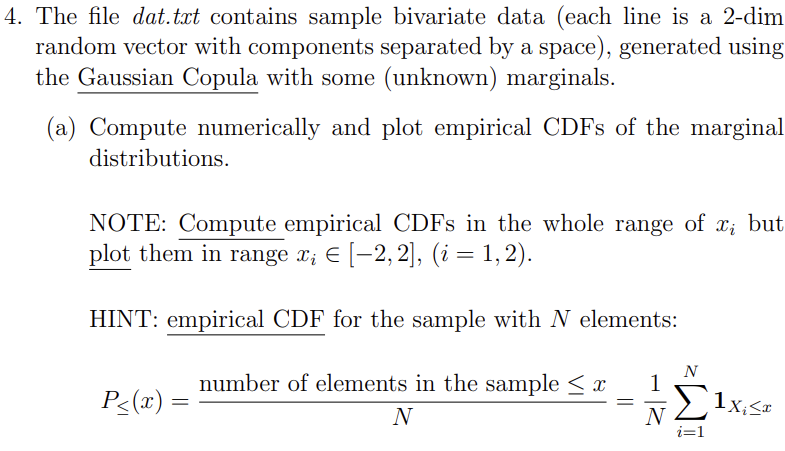

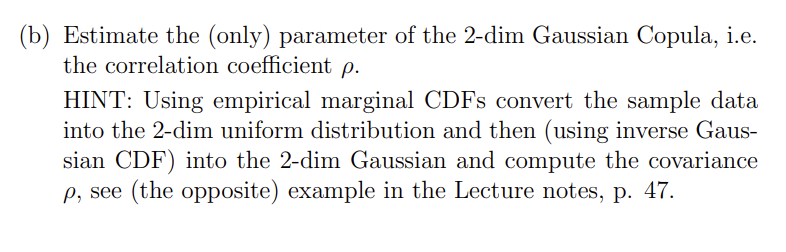